In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('tested.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
# to check null values or not

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# Drop  cabin features from  dataset

df = df.drop(['Cabin'], axis = 1)


In [9]:
median = df['Fare'].dropna().median()
median

14.4542

In [10]:
df['Fare'].fillna(median, inplace = True)

In [11]:
median = df['Age'].dropna().median()
median

27.0

In [12]:
df['Age'].fillna(median, inplace = True)

In [13]:
#to assure that there is no missing value

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
df[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,1.0
1,male,0.0


In [16]:
#To figure out correlation

In [17]:
df.corr()

C:\Users\Shree\AppData\Local\Temp\ipykernel_10656\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.031447,0.003818,0.043080,0.008633
Survived,-0.023245,1.000000,-0.108615,0.008035,0.099943,0.159120,0.192036
Pclass,-0.026751,-0.108615,1.000000,-0.467853,0.001087,0.018721,-0.577313
Age,-0.031447,0.008035,-0.467853,1.000000,-0.071197,-0.043731,0.342357
SibSp,0.003818,0.099943,0.001087,-0.071197,1.000000,0.306895,0.171912
Parch,0.043080,0.159120,0.018721,-0.043731,0.306895,1.000000,0.230325
Fare,0.008633,0.192036,-0.577313,0.342357,0.171912,0.230325,1.000000


In [18]:
#heatmap

C:\Users\Shree\AppData\Local\Temp\ipykernel_10656\3028576344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

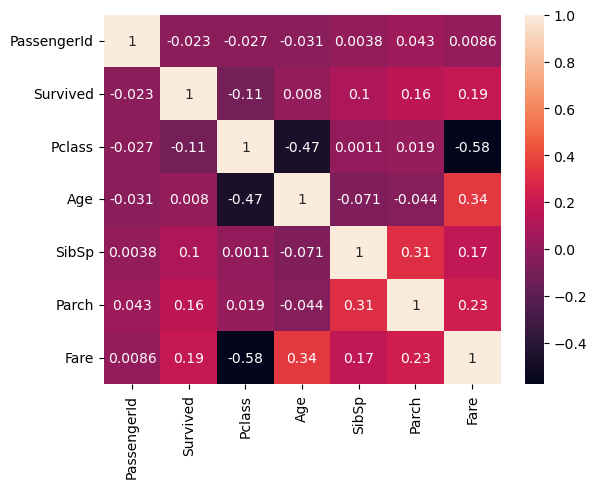

In [19]:
sns.heatmap(df.corr(), annot = True)

<Axes: ylabel='Count'>

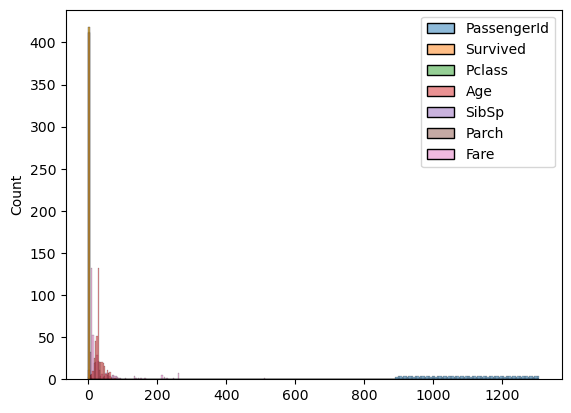

In [20]:
sns.histplot(df)

C:\Users\Shree\AppData\Local\Temp\ipykernel_10656\3098556081.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.distplot(df.corr())
C:\Users\Shree\AppData\Local\Temp\ipykernel_10656\3098556081.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.corr())


<Axes: ylabel='Density'>

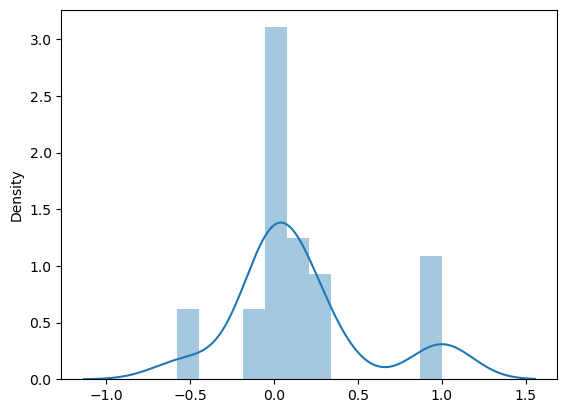

In [21]:
sns.distplot(df.corr())

In [22]:
#TO ENCODE THE STRING DATA

In [23]:
# Get title from name

df['Title'] = [name.split(',')[1].split('.')[0].strip() for name in df['Name']]
df[['Name', 'Title']].head(75)

,Name,Title
0,"Kelly, Mr. James",Mr
1,"Wilkes, Mrs. James (Ellen Needs)",Mrs
2,"Myles, Mr. Thomas Francis",Mr
3,"Wirz, Mr. Albert",Mr
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs
...,...,...
70,"Mulvihill, Miss. Bertha E",Miss
71,"Minkoff, Mr. Lazar",Mr
72,"Nieminen, Miss. Manta Josefina",Miss
73,"Ovies y Rodriguez, Mr. Servando",Mr


In [24]:
df=pd.get_dummies(df,columns=['Sex','Title','Embarked'],drop_first=True)

In [25]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Title_Dona,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,0,0,0,0,1,0,0,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,0,0,0,0,1,0,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,0,0,0,0,1,0,0,0,1,0
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,0,0,0,1,0,0,0,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",27.0,0,0,A.5. 3236,8.0500,1,0,0,0,0,1,0,0,0,0,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,0,1,0,0,0,0,0,0,0,0,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,1,0,0,0,0,1,0,0,0,0,1
416,1308,0,3,"Ware, Mr. Frederick",27.0,0,0,359309,8.0500,1,0,0,0,0,1,0,0,0,0,1


In [27]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [28]:
X=df.drop(['Survived','Name','Ticket'],axis=1)
y=df.iloc[:,1:2]

In [29]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
# Machine learning models

from sklearn.tree import DecisionTreeClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV



In [31]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

# ACCURACY OF THE MODEL

In [32]:
acc_decision_tree


100.0

In [33]:
r2_score(y_test,y_pred)

1.0